In [86]:
import cv2
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline 

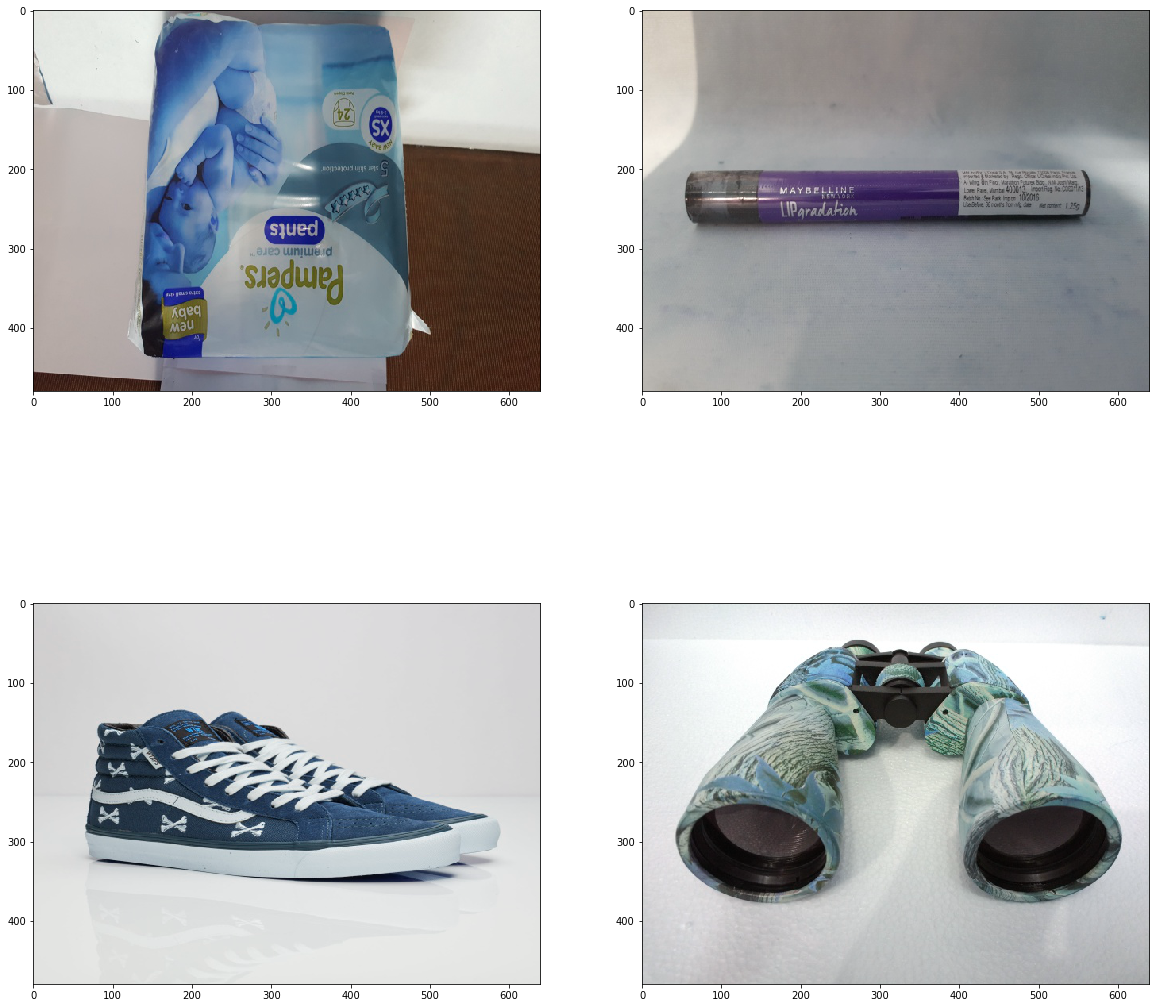

In [18]:
fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 2
folder = '/home/pratyush/Mask_RCNN/mrcnn/imgs/training_imgs/'
for no,filename in enumerate(os.listdir(folder)):
    if no == 4:
        break
    img = cv2.imread(os.path.join(folder,filename))
    fig.add_subplot(rows, columns, no+1)
    plt.imshow(img)

plt.show()

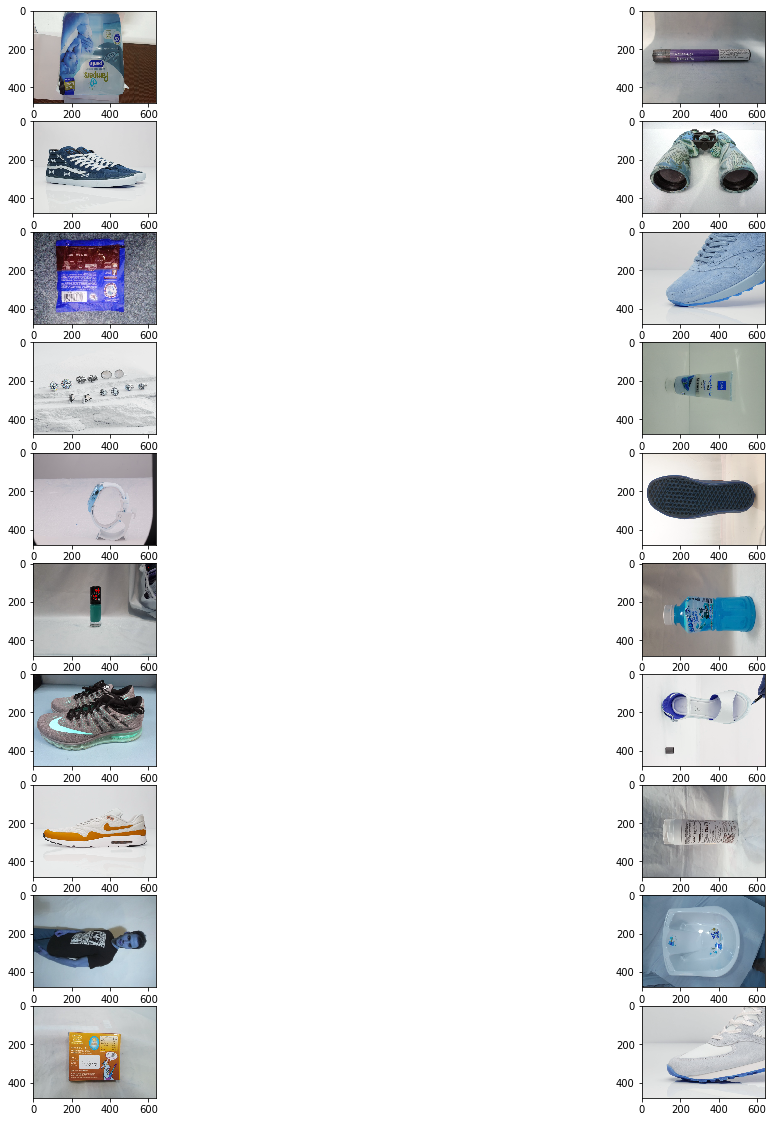

In [84]:
fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 10
folder = '/home/pratyush/Mask_RCNN/mrcnn/imgs/training_imgs/'
for no,filename in enumerate(os.listdir(folder)):
    if no == 20:
        break
    im = cv2.imread(os.path.join(folder,filename))
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    contours,hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
#         rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
        
        roi=im[y:y+h,x:x+w]
#         print((x,y,w,h))
        
        im=cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
    fig.add_subplot(rows, columns, no+1)
    plt.imshow(im)
#     plt.add_patch(rect)

plt.show()

In [90]:
data_test = pd.read_csv('/home/pratyush/Downloads/test.csv')
folder = '/home/pratyush/Downloads/images/'
# for no,filename in enumerate(os.listdir(folder)):
#     if no == 1:
#         break

im = cv2.imread(os.path.join(folder,data_test["image_name"].values[19]))

0.0188671875
0.0296484375
0.06897786458333334
0.1203125
0.062164713541666666
0.062164713541666666


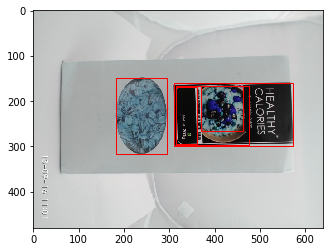

In [80]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200)
contours,hierarchy = cv2.findContours(edged,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    per=(w*h/(edged.shape[0]*edged.shape[1]))
    
    if per>0.01 and per<0.9:
        print(per)
        rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)

plt.show()

In [ ]:
res=[]
for i in data_test["image_name"].values:
    im = cv2.imread(os.path.join(folder,i))
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(gray, 30, 200)
    
    contours,hierarchy = cv2.findContours(edged,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    max_per=0
    max_cnt=[1,2,3,4]

    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        per=(w*h/(im.shape[0]*im.shape[1]*1.0))
        if per > 0.01 and per < 0.9:
            if per>max_per :
                max_per=per
                max_cnt=[x,x+w,y,y+h]
    res.append(max_cnt)

In [94]:
data_test[["x1","x2","y1","y2"]]=res

[[236, 438, 88, 400],
 [300, 566, 145, 321],
 [153, 640, 58, 480],
 [226, 342, 107, 404],
 [155, 298, 212, 355],
 [215, 291, 30, 450],
 [233, 388, 279, 480],
 [184, 333, 41, 287],
 [95, 640, 0, 467],
 [282, 530, 209, 475]]

In [ ]:
data_test.to